In [5]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact

import plotly.graph_objects as go
import pandas as pd



In [8]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
    #     print(num_str)
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])
    #     print(states[i_1,:])    

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


In [43]:
Nrep=10000
r=3 # local Hilbert space dim

La=2
Lb=2
L=12
Lc=L-La-Lb

Na=r**La
Nb=r**Lb
Nc=r**Lc

s_b = Hilbertspace_Zr(Lb,r)
s_a = Hilbertspace_Zr(La,r)
va = np.sum(s_a,axis=1)

# print(va)

s_c=Hilbertspace_Zr(Lc,r)
s_ab=Hilbertspace_Zr(La+Lb,r)

i_ab=np.zeros((r**(La+Lb-1),r-1),dtype=int)
i_c=np.zeros((r**(Lc-1),r-1),dtype=int)
### indices of r multiples
# for i_r in range(r):
#     i_c[:,i_r]=np.argwhere(np.mod(np.sum(s_c,axis=1),r)==i_r)
# #     i_ab[:,i_r]=find(mod(sum(s_ab,2),r)==i_r);

# %%% uncomment if you want to set the rand num generator seed %%%%
# % rng(sum(100*clock()));
# % rng(11)
# Ne_ab=r^(La+Lb-1);
# Ne_c=r^(Lc-1);
# X=np.zeros((Na*Nb,Nc))
# v1=zeros(Nrep*Nb*Na,1);
neg=np.zeros(Nrep)
v1b=np.zeros(Nrep*Nb*Na)
v1=np.zeros(Nrep*Nb*Na)
negb=np.zeros(Nrep)

for i_r in range(Nrep):
    i_r
    #### no symmetry
    X=np.random.randn(Na*Nb,Nc)+1j*np.random.randn(Na*Nb,Nc)

#     X(i_ab(:,1),i_c(:,1))=randn(Ne_ab,Ne_c)+1j*randn(Ne_ab,Ne_c);
#     X(i_ab(:,1),:)=randn(Ne_ab,Nc)+1j*randn(Ne_ab,Nc);
    #### imposing Z_3 symmetry
#     for i_Zr=2:r
#         X(i_ab(:,i_Zr),i_c(:,r-i_Zr+1))=randn(Ne_ab,Ne_c)+1j*randn(Ne_ab,Ne_c);
# #    X(ie_ab,io_c)=randn(Ne_ab,No_c)+1j*randn(Ne_ab,No_c);
# #    X(ie_ab,:)=randn(Ne_ab,Nc)+1j*randn(Ne_ab,Nc);
# #    X(io_ab,io_c)=randn(No_ab,No_c)+1j*randn(No_ab,No_c);
    mat=np.dot(X,np.matrix(X).H)
    rho= mat / np.trace(mat)
    l1=np.linalg.eigvalsh(rho)
    v1[i_r*Nb*Na:(i_r+1)*Nb*Na] = (Na*Nb)*l1
    
    rT2b = p_transpose_2(rho,Na,Nb)
    l1T=np.linalg.eigvalsh(rT2b)
    v1b[i_r*Nb*Na:(i_r+1)*Nb*Na] = (Na*Nb)*l1T
    negb[i_r]=np.sum(np.abs(l1T))

# %%
# % bw=1/(100*Na*Nb); % bin width
# figure(123);
# % histogram(v1b,'BinWidth',bw,'DisplayStyle','stairs','Normalization','probability') 
# histogram(v1b,100,'DisplayStyle','stairs')%,'Normalization','probability') 
# hold all
# %%
# % figure(124);
# % plot(negb,'o')
# % hold all

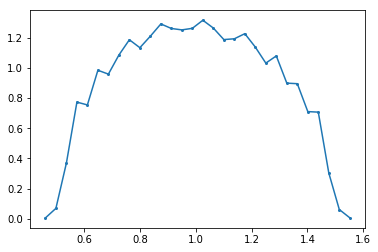

In [42]:
num_bins = 30
# n, bins, patches = plt.hist(v1b, num_bins, facecolor='blue', alpha=0.5)
n, bin_edges = np.histogram(v1b, bins=num_bins)
# plt.show()

bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

# n, bins, patches = plt.hist(v1, num_bins, facecolor='red', alpha=0.5)
# plt.ylim(0,2000)
# plt.show()
plt.figure()
plt.plot(bins_center,n,'o-',markersize=2)
plt.show()
# print(n.shape,bins.shape)

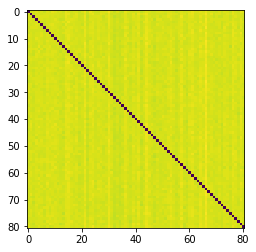

In [48]:
plt.imshow(np.abs(rho-np.diag(rho)));